# Regression Task

This notebook demonstrates a regression task using machine learning. This is a simple demonstration of regression neural network in PyTorch using a single hidden layer, one output layer and one hidden layer. The polynomials to be learnt are:

1) 2x^2 + 4x + 2
2) 4x^2 + 4x + 10 

In [155]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [156]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.hidden = nn.Linear(1, 10)  # One hidden layer with 10 neurons
        self.relu = nn.ReLU()
        self.output = nn.Linear(10, 1)  # Output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x


In [157]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, x, y):   
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [158]:
def custom_loss(model, criterion, outputs, y_data, old_params, param_importance, lambda_reg):
    normal_loss = criterion(outputs, y_data)
    reg_loss = 0.0
    for name, param in model.named_parameters():
        if param.requires_grad:
            reg_loss += torch.sum(param_importance[name] * (param - old_params[name]) ** 2)
    
    total_loss = normal_loss + lambda_reg * reg_loss
    return total_loss


In [159]:
np.random.seed(42)
x = np.random.uniform(-10, 10, 1000)
y = 2 * x**2 + 4 * x + 2
parameter_importance = {}
new_weights = {}
old_weights = {}

# Convert data to PyTorch tensors
x_train_1 = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # Shape: (5000, 1)
y_train_1 = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Shape: (500, 1)

dataset = CustomDataset(x_train_1, y_train_1)

dataloader_1 =DataLoader(dataset, batch_size=32, shuffle=True)  


In [160]:
def train_model(model,x_train,y_train,num_epochs,optimizer,device):
    losses = []
    global new_weights
    global old_weights
    old_weights = new_weights
    criterion = nn.MSELoss()
    for epoch in range(num_epochs):
    # Forward pass
        outputs = model(x_train.to(device))
        loss = criterion(outputs, y_train.to(device))

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        # if (epoch + 1) % 50 == 0:
        #     print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")
        #     print()
    
    new_weights = {name: param.clone().detach() for name, param in model.named_parameters()}
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()


In [161]:
def train_model_with_custom_loss(model,x_train,y_train,num_epochs,optimizer,device):
    losses = []
    global new_weights
    global old_weights
    old_weights = new_weights
    for epoch in range(num_epochs):
    # Forward pass
        outputs = model(x_train.to(device))
        loss = custom_loss(model,nn.MSELoss(),outputs,y_train.to(device),old_weights,parameter_importance,0.1)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        # if (epoch + 1) % 50 == 0:
        #     print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")
        #     print()
    
    new_weights = {name: param.clone().detach() for name, param in model.named_parameters()}
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

cuda


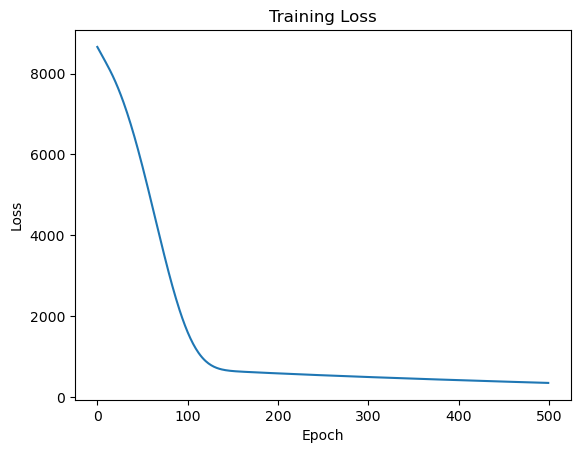

In [162]:
model_1 = RegressionModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_1.to(device)
print(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.01)

# Train the model_1
num_epochs = 500
train_model(model_1,x_train_1,y_train_1,num_epochs,optimizer,device)

# Save the trained model
torch.save(model_1.state_dict(), "model_1.pth")

cuda


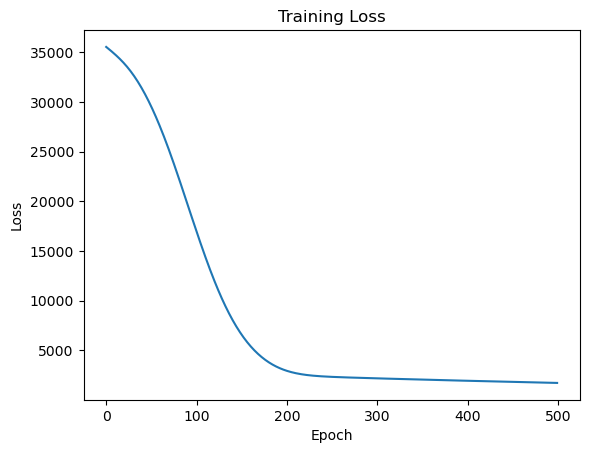

In [163]:
np.random.seed(42)
x = np.random.uniform(-10, 10, 1000)
y = 4 * x**2 + 4 * x + 10

# Convert data to PyTorch tensors
x_train_2 = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # Shape: (5000, 1)
y_train_2 = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Shape: (500, 1)

dataset = CustomDataset(x_train_2, y_train_2)

dataloader_2 =DataLoader(dataset, batch_size=32, shuffle=True)

model_2 = RegressionModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_2.to(device)
print(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.01)

# Train the model_2
num_epochs = 500
train_model(model_2,x_train_2,y_train_2,num_epochs,optimizer,device)
torch.save(model_2.state_dict(), "model_2.pth")


cuda


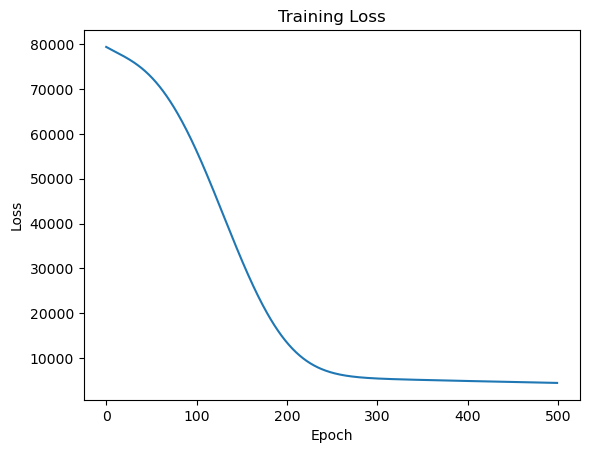

In [164]:
np.random.seed(42)
x = np.random.uniform(-10, 10, 1000)
y = 6 * x**2 + 7 * x + 9

# Convert data to PyTorch tensors
x_train_3 = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # Shape: (5000, 1)
y_train_3 = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Shape: (500, 1)

dataset = CustomDataset(x_train_3, y_train_3)
dataloader_3 =DataLoader(dataset, batch_size=32, shuffle=True)

model_3 = RegressionModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model_3.to(device)
print(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_3.parameters(), lr=0.01)

# Train the model_3
num_epochs = 500
train_model(model_3,x_train_3,y_train_3,num_epochs,optimizer,device)
torch.save(model_3.state_dict(), "model_3.pth")

cuda


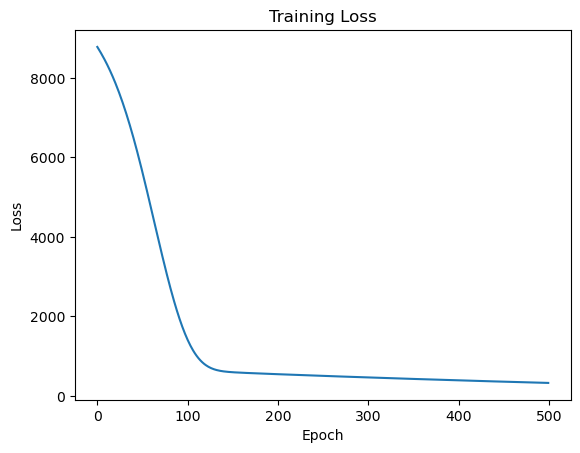

In [165]:
model_4 = RegressionModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model_4.to(device)
print(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_4.parameters(), lr=0.01)

# Train the model_2
num_epochs = 500
train_model(model_4,x_train_1,y_train_1,num_epochs,optimizer,device)

In [166]:
def calculate_importance_weights(model, x_data, y_data, parameter_importance):
    x_data = x_data.to(device)
    y_data = y_data.to(device)
    model.to(device)

    outputs = model(x_data)
    loss = criterion(outputs, y_data)

    optimizer.zero_grad()

    loss.backward()
    for name, param in model.named_parameters():
        if param.grad is not None:
            if name in parameter_importance:
                parameter_importance[name] += abs(param.grad.clone().detach())
            else:
                parameter_importance[name] = abs(param.grad.clone().detach())
    
    return parameter_importance

def update_param_importance(dataloader, parameter_importance):
    
    for batch in dataloader:
        x_data, y_data = batch
        parameter_importance = calculate_importance_weights(model_4, x_data, y_data, parameter_importance)

    for key in parameter_importance:
        parameter_importance[key] /= len(dataloader)

    print(parameter_importance)


In [167]:
def calculate_importance_weights_new(model, x_data, y_data, parameter_importance, loss_sum):
    x_data = x_data.to(device)
    y_data = y_data.to(device)
    model.to(device)

    outputs = model(x_data)
    loss = criterion(outputs, y_data)

    optimizer.zero_grad()
    loss.backward()

    loss_weight = loss.detach()  # Get scalar loss value to weight gradients
    loss_sum += loss_weight

    for name, param in model.named_parameters():
        if param.grad is not None:
            weighted_grad = abs(param.grad.clone().detach()) * loss_weight
            if name in parameter_importance:
                parameter_importance[name] += weighted_grad
            else:
                parameter_importance[name] = weighted_grad

    return parameter_importance, loss_sum

def update_param_importance_new(dataloader, parameter_importance):

    loss_sum = 0
    for batch in dataloader:
        x_data, y_data = batch
        parameter_importance, loss_sum = calculate_importance_weights_new(model_4, x_data, y_data, parameter_importance, loss_sum)

    for key in parameter_importance:
        parameter_importance[key] /= loss_sum

    print(parameter_importance)


In [168]:
import torch

def calculate_importance_weights_exp(model, x_data, y_data, parameter_importance, weight_sum, alpha):
    x_data = x_data.to(device)
    y_data = y_data.to(device)
    model.to(device)

    outputs = model(x_data)
    loss = criterion(outputs, y_data)

    optimizer.zero_grad()
    loss.backward()

    loss_weight = torch.exp(alpha * loss.detach())  # Exponential weight based on loss
    weight_sum += loss_weight  # Accumulate total weight sum for normalization

    for name, param in model.named_parameters():
        if param.grad is not None:
            weighted_grad = abs(param.grad.clone().detach()) * loss_weight
            if name in parameter_importance:
                parameter_importance[name] += weighted_grad
            else:
                parameter_importance[name] = weighted_grad

    return parameter_importance, weight_sum

def update_param_importance_exp(dataloader, parameter_importance, alpha=0.01):

    weight_sum = 0  # Keeps track of total sample weights

    for batch in dataloader:
        x_data, y_data = batch
        parameter_importance, weight_sum = calculate_importance_weights_exp(model_4, x_data, y_data, parameter_importance, weight_sum, alpha)

    # Normalize importance using total weight sum (exponentially weighted average)
    if weight_sum > 0:
        for key in parameter_importance:
            parameter_importance[key] /= weight_sum  

    print(parameter_importance)


In [169]:
# update_param_importance(dataloader_1, parameter_importance)
update_param_importance_exp(dataloader_1, parameter_importance)

{'hidden.weight': tensor([[43.0506],
        [54.0190],
        [39.6052],
        [43.3583],
        [37.0215],
        [33.2021],
        [36.9407],
        [54.1620],
        [25.9505],
        [42.8638]], device='cuda:0'), 'hidden.bias': tensor([7.9495, 9.9399, 8.5587, 9.3910, 8.0185, 7.0749, 7.8487, 9.9997, 5.6225,
        9.2669], device='cuda:0'), 'output.weight': tensor([[67.3106, 61.0742, 43.1542, 39.9025, 49.7172, 57.2054, 55.2575, 52.2920,
         42.3324, 40.9133]], device='cuda:0'), 'output.bias': tensor([9.7239], device='cuda:0')}


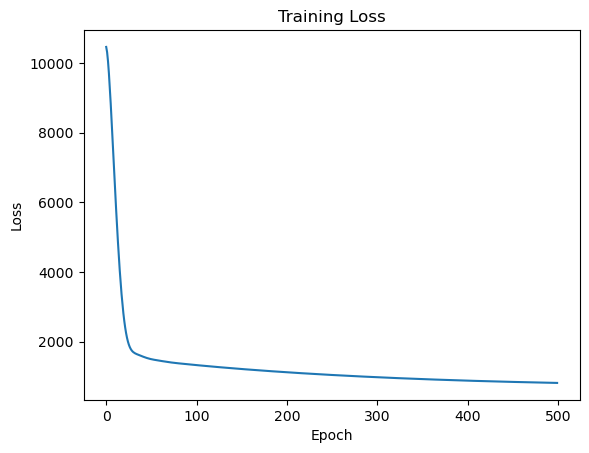

{'hidden.weight': tensor([[153.9591],
        [180.6134],
        [ 84.1789],
        [ 92.6587],
        [ 80.4183],
        [ 67.0703],
        [ 71.0908],
        [178.0319],
        [ 69.7870],
        [ 89.0676]], device='cuda:0'), 'hidden.bias': tensor([21.5399, 25.2482, 11.0975, 12.5471, 10.9245,  8.4544,  8.7602, 25.1091,
         9.7094, 12.0995], device='cuda:0'), 'output.weight': tensor([[173.3026, 157.5737,  72.4713,  68.2061,  81.7021,  90.6455,  87.1504,
         142.3586,  73.5277,  68.9073]], device='cuda:0'), 'output.bias': tensor([7.9804], device='cuda:0')}


In [170]:
train_model_with_custom_loss(model_4,x_train_2,y_train_2,num_epochs,optimizer,device)

# update_param_importance(dataloader_2, parameter_importance)
update_param_importance_exp(dataloader_2, parameter_importance)

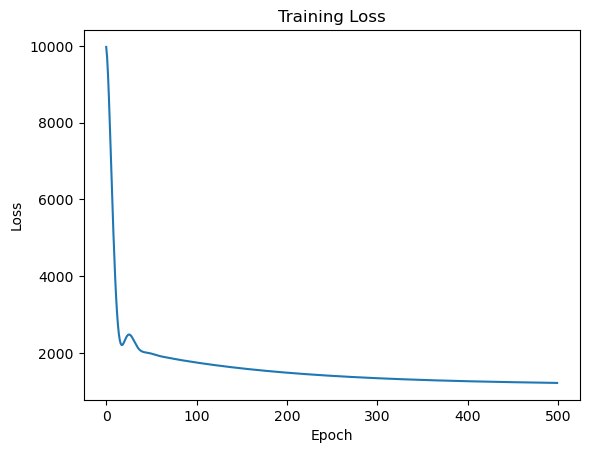

In [171]:
train_model_with_custom_loss(model_4,x_train_3,y_train_3,num_epochs,optimizer,device)

In [172]:
model_4.eval()

# Initialize x_test and y_test
x_test = torch.tensor([])
y_test = torch.tensor([])

# Randomly sample 200 samples
indices = torch.randperm(x_train_1.size(0))[:200]

x_sample = x_train_1[indices]
y_sample = y_train_1[indices]

# Append to x_test and y_test
x_test = torch.cat((x_test, x_sample))
y_test = torch.cat((y_test, y_sample))

indices = torch.randperm(x_train_2.size(0))[:200]

x_sample = x_train_2[indices]
y_sample = y_train_2[indices]  

x_test = torch.cat((x_test, x_sample))
y_test = torch.cat((y_test, y_sample))

indices = torch.randperm(x_train_3.size(0))[:200]

x_sample = x_train_3[indices]
y_sample = y_train_3[indices]  

x_test = torch.cat((x_test, x_sample))
y_test = torch.cat((y_test, y_sample))

x_test = x_test.to(device)
y_test = y_test.to(device)
model_4.to(device)

outputs = model_4(x_test)

y_pred = outputs.detach().cpu().numpy()

y_avg = 4 * x_test.cpu().numpy()**2 + 4 * x_test.cpu().numpy() + 7

outputs_1 = model_1(x_test)
outputs_2 = model_2(x_test)
outputs_3 = model_3(x_test)

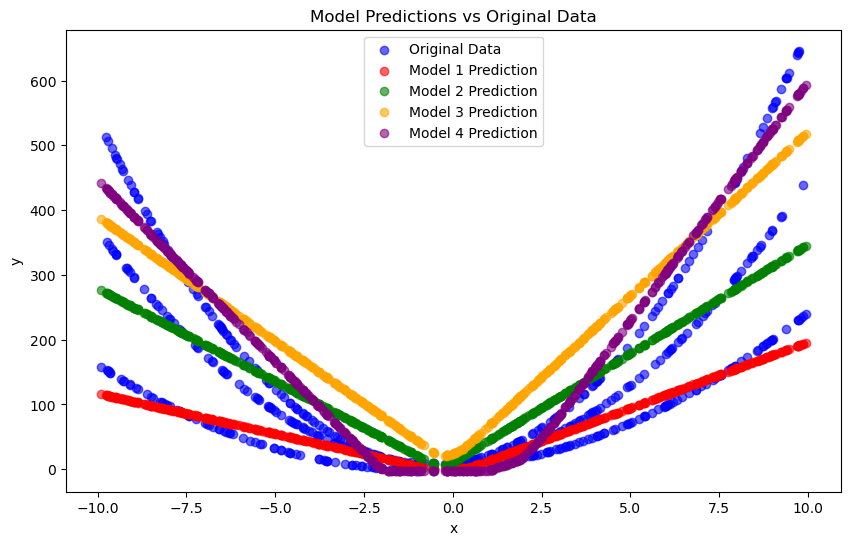

Model 1 MSE: 15903.3799
Model 2 MSE: 7831.8198
Model 3 MSE: 15898.3096
Model 4 MSE: 14323.7471


In [173]:
# plt.figure(figsize=(10, 6))
# plt.scatter(x_test.cpu().numpy(), y_test.cpu().numpy(), label="Original Data", color="blue", alpha=0.6)

# Model predictions
y_pred_1 = outputs_1.detach().cpu().numpy()
y_pred_2 = outputs_2.detach().cpu().numpy()
y_pred_3 = outputs_3.detach().cpu().numpy()
y_pred_4 = outputs.detach().cpu().numpy()

# import matplotlib.pyplot as plt
# import numpy as np

plt.figure(figsize=(10, 6))

# Scatter plot for original data
plt.scatter(x_test.cpu().numpy(), y_test.cpu().numpy(), label="Original Data", color="blue", alpha=0.6)

# Model predictions - Use scatter instead of plot
plt.scatter(x_test.cpu().numpy(), y_pred_1, label="Model 1 Prediction", color="red", alpha=0.6)
plt.scatter(x_test.cpu().numpy(), y_pred_2, label="Model 2 Prediction", color="green", alpha=0.6)
plt.scatter(x_test.cpu().numpy(), y_pred_3, label="Model 3 Prediction", color="orange", alpha=0.6)
plt.scatter(x_test.cpu().numpy(), y_pred_4, label="Model 4 Prediction", color="purple", alpha=0.6)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Model Predictions vs Original Data")
plt.show()


# Calculating Mean Squared Error for each model
mse_1 = np.mean((y_pred_1 - y_test.cpu().numpy())**2)
mse_2 = np.mean((y_pred_2 - y_test.cpu().numpy())**2)
mse_3 = np.mean((y_pred_3 - y_test.cpu().numpy())**2)
mse_4 = np.mean((y_pred_4 - y_test.cpu().numpy())**2)

print(f"Model 1 MSE: {mse_1:.4f}")
print(f"Model 2 MSE: {mse_2:.4f}")
print(f"Model 3 MSE: {mse_3:.4f}")
print(f"Model 4 MSE: {mse_4:.4f}")

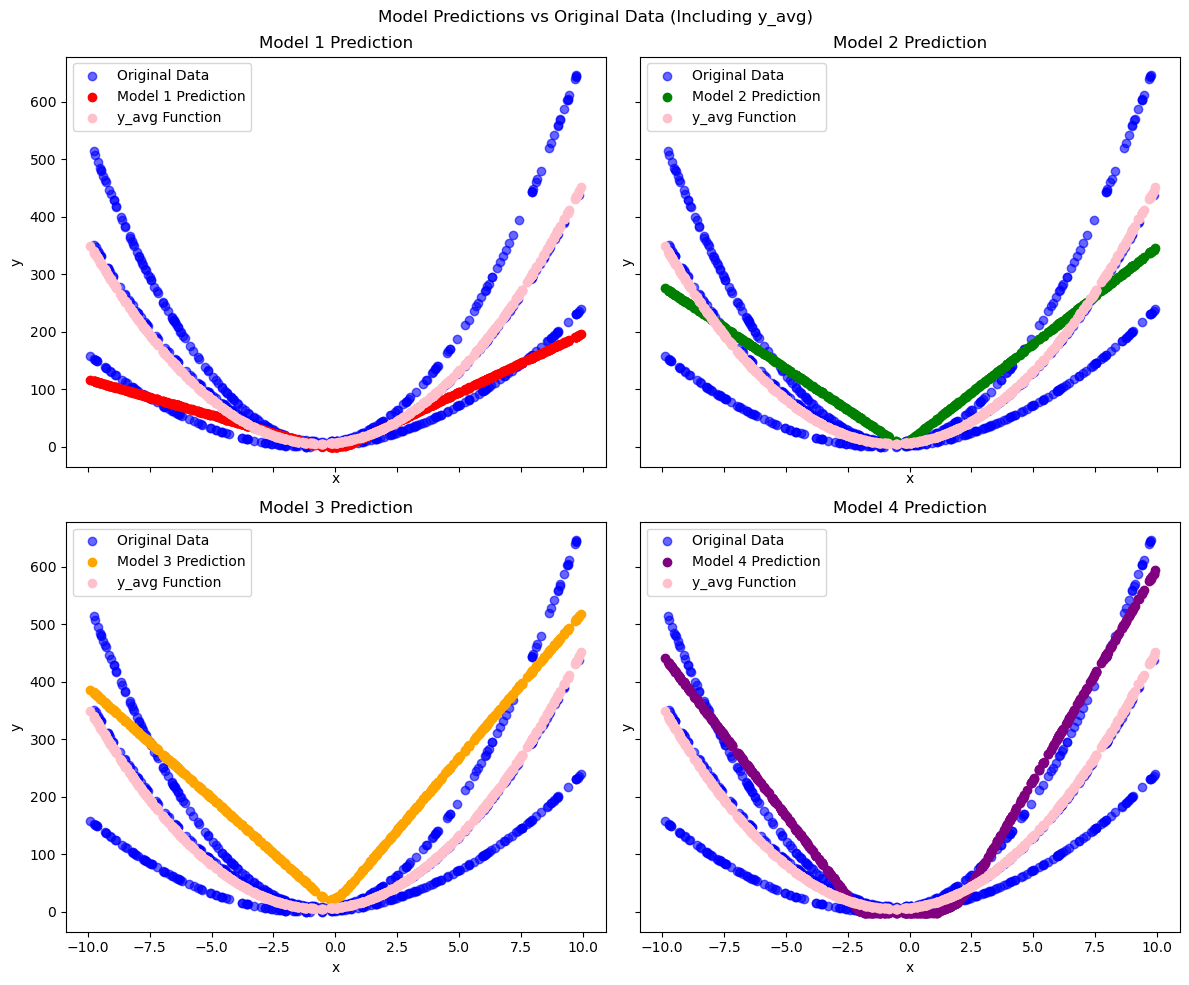

In [174]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

models = [
    (y_pred_1, "Model 1 Prediction", "red"),
    (y_pred_2, "Model 2 Prediction", "green"),
    (y_pred_3, "Model 3 Prediction", "orange"),
    (y_pred_4, "Model 4 Prediction", "purple"),
]

x_vals = x_test.cpu().numpy()
y_vals = y_test.cpu().numpy()
y_avg = 4 * x_vals**2 + 5 * x_vals + 7  # Defined function

for i, (y_pred, title, color) in enumerate(models):
    axes[i].scatter(x_vals, y_vals, label="Original Data", color="blue", alpha=0.6)
    axes[i].scatter(x_vals, y_pred, label=title, color=color)
    axes[i].scatter(x_vals, y_avg, label="y_avg Function", color="pink")  # Added y_avg
    axes[i].set_title(title)
    axes[i].legend()
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")

plt.suptitle("Model Predictions vs Original Data (Including y_avg)")
plt.tight_layout()
plt.show()

In [175]:
print(old_weights)
print(new_weights)

{'hidden.weight': tensor([[-3.7420],
        [-3.4778],
        [ 2.5052],
        [ 2.3908],
        [ 2.8360],
        [ 3.0092],
        [ 2.8755],
        [-3.0929],
        [ 2.6264],
        [ 2.3922]], device='cuda:0'), 'hidden.bias': tensor([-4.5015, -5.0751, -3.4388, -3.8027, -4.0706, -2.5211, -2.2468, -3.9407,
        -5.1489, -3.4386], device='cuda:0'), 'output.weight': tensor([[3.0104, 3.5557, 2.5613, 2.8386, 2.4498, 2.0202, 2.1399, 3.4839, 2.1806,
         2.7133]], device='cuda:0'), 'output.bias': tensor([-1.2222], device='cuda:0')}
{'hidden.weight': tensor([[-4.3132],
        [-3.9979],
        [ 3.0073],
        [ 2.7927],
        [ 3.3285],
        [ 3.6377],
        [ 3.4890],
        [-3.6276],
        [ 2.9227],
        [ 2.8521]], device='cuda:0'), 'hidden.bias': tensor([-7.9056, -8.5550, -5.5573, -6.2720, -6.2674, -3.9214, -3.5350, -7.3046,
        -8.2980, -5.6383], device='cuda:0'), 'output.weight': tensor([[4.2904, 5.0039, 3.5445, 3.9432, 3.4204, 2.7575, 2.8551